In [2]:
import tensorflow

In [3]:
#data

In [4]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
train_labels.shape

(60000,)

In [7]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

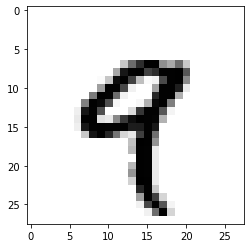

In [8]:
digit1=train_images[4]
import matplotlib.pyplot as plt
plt.imshow(digit1, cmap=plt.cm.binary)
plt.show()

In [9]:
#network connection

In [10]:
from tensorflow.keras import models
from tensorflow.keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [11]:
#compilation step

In [12]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
#preprocess the data scaling

In [14]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [15]:
#reshape

In [16]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [17]:
train_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
test_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
#one hot encoding for labels

In [20]:
train_labels[0]

5

In [21]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [22]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [23]:
#trainning

In [24]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.4384 - accuracy: 0.8714
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1101 - accuracy: 0.9681
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0680 - accuracy: 0.9792
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0488 - accuracy: 0.9850
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0357 - accuracy: 0.9891


In [25]:
network.fit(train_images, train_labels, epochs=20, batch_size=128)

Epoch 1/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0287 - accuracy: 0.9919
Epoch 2/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0218 - accuracy: 0.9937
Epoch 3/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0167 - accuracy: 0.9952
Epoch 4/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0126 - accuracy: 0.9966
Epoch 5/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0096 - accuracy: 0.9974
Epoch 6/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0077 - accuracy: 0.9978
Epoch 7/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0063 - accuracy: 0.9982
Epoch 8/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0045 - accuracy: 0.9988
Epoch 9/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0040 - accuracy: 0.9989
Epoch 10/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0029 - accuracy: 0.9

In [26]:
network.fit(train_images, train_labels, epochs=25, batch_size=128)

Epoch 1/25
469/469 [==============================] - 5s 10ms/step - loss: 3.8471e-04 - accuracy: 0.9999
Epoch 2/25
469/469 [==============================] - 5s 10ms/step - loss: 2.2065e-04 - accuracy: 0.9999
Epoch 3/25
469/469 [==============================] - 5s 10ms/step - loss: 1.9348e-04 - accuracy: 0.9999
Epoch 4/25
469/469 [==============================] - 5s 10ms/step - loss: 1.1442e-04 - accuracy: 1.0000
Epoch 5/25
469/469 [==============================] - 5s 10ms/step - loss: 1.6289e-04 - accuracy: 0.9999
Epoch 6/25
469/469 [==============================] - 5s 10ms/step - loss: 1.2583e-04 - accuracy: 1.0000
Epoch 7/25
469/469 [==============================] - 5s 12ms/step - loss: 1.1219e-04 - accuracy: 1.0000 0s - loss: 1.1257e-04 - accuracy: 1.00
Epoch 8/25
469/469 [==============================] - 6s 14ms/step - loss: 1.3211e-04 - accuracy: 0.9999
Epoch 9/25
469/469 [==============================] - 5s 11ms/step - loss: 6.1635e-05 - accuracy: 1.0000
Epoch 10/25
469/

In [29]:
#testing

In [30]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1377 - accuracy: 0.9833
test_acc: 0.983299970626831
